# Computation-Aware Gaussian Processes

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Learning to Navigate

### Landscape 

In [65]:
# Rosenbrock function
b = 10
f1 = lambda x, y: (x - 1) ** 2 + b * (y - x**2) ** 2

# Himmelblau's function
f1 = lambda x, y: (x**2 + y - 11) ** 2 + (x + y**2 - 7) ** 2
f = lambda x, y: f1(8 * (x / 100 - 0.5), 8 * (y / 100 - 0.5))


In [66]:
# Evaluate function
X = np.arange(0, 100, 0.1)
Y = np.arange(0, 100, 0.1)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

In [67]:
# Plot

# Compute gradients for visualization
[gy, gx] = np.gradient(-Z)


def gradient_plot(ax, x, y, gx, gy, skip=2):
    Q = ax.quiver(
        x[::skip, ::skip],
        y[::skip, ::skip],
        gx[::skip, ::skip],
        gy[::skip, ::skip],
        pivot="mid",
        units="inches",
    )
    qk = ax.quiverkey(
        Q, 0.9, 0.9, 1, r"$1 \frac{m}{s}$", labelpos="E", coordinates="figure"
    )


### Planning

In [103]:
import networkx as nx

n_grid = 200

# Graph
G = nx.hexagonal_lattice_graph(n_grid, n_grid, with_positions=True)
# G = nx.triangular_lattice_graph(n_grid, n_grid, with_positions=True)
G = G.to_directed()
nx.set_edge_attributes(
    G, {e: cost(G.nodes[e[0]], G.nodes[e[1]]) for e in G.edges()}, "cost"
)

def dist(a, b):
    """Heuristic for A* algorithm."""
    (x1, y1) = G.nodes[a]["pos"]
    (x2, y2) = G.nodes[b]["pos"]
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

def cost(a, b):
    """Cost moving from node a to b."""
    diff = f(b["pos"][0], b["pos"][1]) - f(a["pos"][0], a["pos"][1])
    if diff >= 0:
        return (diff + 1.0) ** 2
    else:
        return 1 / (-diff + 1.0) ** 2


start = (54, 20)
end = (2, 10)
path_nodes = nx.astar_path(G, start, end, heuristic=dist, weight="cost")
path = np.vstack([G.nodes[node]["pos"] for node in path_nodes])
# path = np.vstack(nx.dijkstra_path(G, start, end, weight="cost"))

length = nx.astar_path_length(G, start, end, heuristic=None, weight="cost")


Path length:  759.2351190209666


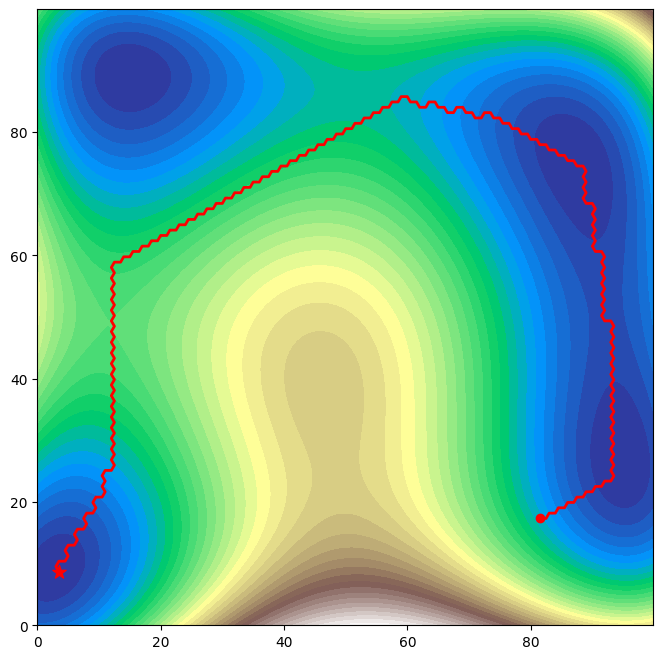

In [104]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.contourf(X, Y, Z, levels=50, cmap="terrain")
# gradient_plot(ax, X, Y, gx, gy)
ax.scatter(*G.nodes[start]["pos"], color="red")
ax.scatter(*G.nodes[end]["pos"], color="red", marker="*", s=100)
ax.plot(path[:, 0], path[:, 1], color="red", lw=2)
ax.set_aspect("equal")
print("Path length: ", length)

In [117]:
nx.get_node_attributes(G, "pos")

{(0, 0): (0.0, 0.0),
 (1, 0): (1.0, 0.0),
 (2, 0): (2.0, 0.0),
 (3, 0): (3.0, 0.0),
 (4, 0): (4.0, 0.0),
 (5, 0): (5.0, 0.0),
 (6, 0): (6.0, 0.0),
 (7, 0): (7.0, 0.0),
 (8, 0): (8.0, 0.0),
 (9, 0): (9.0, 0.0),
 (10, 0): (10.0, 0.0),
 (11, 0): (11.0, 0.0),
 (12, 0): (12.0, 0.0),
 (13, 0): (13.0, 0.0),
 (14, 0): (14.0, 0.0),
 (15, 0): (15.0, 0.0),
 (16, 0): (16.0, 0.0),
 (17, 0): (17.0, 0.0),
 (18, 0): (18.0, 0.0),
 (19, 0): (19.0, 0.0),
 (20, 0): (20.0, 0.0),
 (21, 0): (21.0, 0.0),
 (22, 0): (22.0, 0.0),
 (23, 0): (23.0, 0.0),
 (24, 0): (24.0, 0.0),
 (25, 0): (25.0, 0.0),
 (26, 0): (26.0, 0.0),
 (27, 0): (27.0, 0.0),
 (28, 0): (28.0, 0.0),
 (29, 0): (29.0, 0.0),
 (30, 0): (30.0, 0.0),
 (31, 0): (31.0, 0.0),
 (32, 0): (32.0, 0.0),
 (33, 0): (33.0, 0.0),
 (34, 0): (34.0, 0.0),
 (35, 0): (35.0, 0.0),
 (36, 0): (36.0, 0.0),
 (37, 0): (37.0, 0.0),
 (38, 0): (38.0, 0.0),
 (39, 0): (39.0, 0.0),
 (40, 0): (40.0, 0.0),
 (41, 0): (41.0, 0.0),
 (42, 0): (42.0, 0.0),
 (43, 0): (43.0, 0.0),
 (44, 0)

## Gaussian Processes

## Scaling to Large Datasets

## Computation-Aware Inference

### Design Your Own Policy